In [1]:
import sctour as sct
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_tro = sc.read_csv("/work/LAS/geetu-lab/sarwar/data/10x_V2_processed_data/MTR15682-matrix.csv")

In [3]:
data_tro_t = data_tro.T

In [4]:
data_tro_t

AnnData object with n_obs × n_vars = 15682 × 18909

In [5]:
print(data_tro_t.obs_names[:20])

Index(['E09.5_AAATGCCAGTGTGAAT-3', 'E09.5_AGGGATGGTCGGATCC-3',
       'E09.5_CCGGGATGTTCGGGCT-3', 'E10.5_CAGCGACTCTTCCTTC-5',
       'E10.5_CGACTTCGTCGTGGCT-5', 'E10.5_CGCGGTACACCGCTAG-5',
       'E10.5_GATCAGTCAAACGCGA-5', 'E10.5_TACACGACATATGCTG-5',
       'E10.5_TCAGCAAGTTCGCTAA-5', 'E10.5_TCGTAGACATTTGCTT-5',
       'E10.5h_AAAGATGCACATGGGA-6', 'E10.5h_AACACGTAGCAGCGTA-6',
       'E10.5h_AACCGCGAGGGTTCCC-6', 'E10.5h_AACTCAGAGGCATGTG-6',
       'E10.5h_AAGGTTCAGCGACGTA-6', 'E10.5h_ACACCGGCAGACGTAG-6',
       'E10.5h_ACTGAACTCAGCGACC-6', 'E10.5h_ACTGAGTAGGCTCTTA-6',
       'E10.5h_ACTGAGTGTCTTCTCG-6', 'E10.5h_AGCAGCCTCATATCGG-6'],
      dtype='object')


In [6]:
data_tro_meta = pd.read_csv("/work/LAS/geetu-lab/sarwar/data/10x_V2_processed_data/MTR15682-meta.csv")

In [7]:
data_tro_meta.head()

,Unnamed: 0,orig.ident,nCount_RNA,nFeature_RNA,stage,doublet,score,RNA_snn_res.0.05,seurat_clusters,cluster_14,...,cluster_19,type_19,cluster_17E,type_17E,cluster_21,type_21,branch,S.Score,G2M.Score,Phase
0,E09.5_AAATGCCAGTGTGAAT-3,E09.5,20237,3361,E09.5,0,0.041363,6,3,A,...,17,17 SpA-TGC,17,17 SpA-TGC,17,17 SpA-TGC,Spongio-branch,-0.130559,-0.198378,G1
1,E09.5_AGGGATGGTCGGATCC-3,E09.5,7687,1969,E09.5,0,0.015568,6,3,A,...,17,17 SpA-TGC,17,17 SpA-TGC,17,17 SpA-TGC,Spongio-branch,-0.181270,-0.163931,G1
2,E09.5_CCGGGATGTTCGGGCT-3,E09.5,7874,1626,E09.5,0,0.011292,6,10,A,...,11,11 Secondary P-TGC,11,11 Secondary P-TGC,11,11 Secondary P-TGC,P-TGC branch,-0.190394,-0.213582,G1
3,E10.5_CAGCGACTCTTCCTTC-5,E10.5,8061,2365,E10.5,0,0.017708,6,3,A,...,17,17 SpA-TGC,17,17 SpA-TGC,17,17 SpA-TGC,Spongio-branch,-0.038973,-0.048859,G1
4,E10.5_CGACTTCGTCGTGGCT-5,E10.5,5329,1715,E10.5,0,0.021881,6,3,A,...,17,17 SpA-TGC,17,17 SpA-TGC,17,17 SpA-TGC,Spongio-branch,-0.119824,-0.160544,G1


In [8]:
data_tro_meta['type_21']

0                17 SpA-TGC
1                17 SpA-TGC
2        11 Secondary P-TGC
3                17 SpA-TGC
4                17 SpA-TGC
                ...        
15677    11 Secondary P-TGC
15678    11 Secondary P-TGC
15679    11 Secondary P-TGC
15680    11 Secondary P-TGC
15681            17 SpA-TGC
Name: type_21, Length: 15682, dtype: object

In [9]:
data_tro_t.obs['cell_groups'] = pd.Categorical(data_tro_meta['cluster_21'])

In [10]:
data_tro_t.obs['cell_groups']

E09.5_AAATGCCAGTGTGAAT-3     17
E09.5_AGGGATGGTCGGATCC-3     17
E09.5_CCGGGATGTTCGGGCT-3     11
E10.5_CAGCGACTCTTCCTTC-5     17
E10.5_CGACTTCGTCGTGGCT-5     17
                             ..
E12.5_TTGGCAACAAGGACTG-9     11
E13.5_ATCATGGCAAGACGTG-10    11
E13.5_CCTTCGAAGGTGCACA-10    11
E13.5_CGAGAAGGTCCTGCTT-10    11
E14.5_GCGACCACACAACGTT-11    17
Name: cell_groups, Length: 15682, dtype: category
Categories (17, object): ['1', '10', '11', '12', ..., '9', 'E1', 'E2', 'P1-2-3']

In [11]:
data_tro_t.obs['Sample batch'] = pd.Categorical(data_tro_meta['orig.ident'])

In [12]:
sc.pp.calculate_qc_metrics(data_tro_t, percent_top=None, log1p=False, inplace=True)

In [13]:
sc.pp.highly_variable_genes(data_tro_t, flavor='seurat_v3', n_top_genes=1000, subset=True)

In [14]:
tnode_tro = sct.train.Trainer(data_tro_t, loss_mode='nb', alpha_recon_lec=0.5, alpha_recon_lode=0.5)

Running using CPU.


In [15]:
tnode_tro.train()

Epoch 400: 100%|██████████| 400/400 [07:27<00:00,  1.12s/epoch, train_loss=482, val_loss=491]


In [16]:
data_tro_t.obs['ptime'] = tnode_tro.get_time()

In [17]:
data_tro_t.obs['ptime']

E09.5_AAATGCCAGTGTGAAT-3     0.622112
E09.5_AGGGATGGTCGGATCC-3     0.661761
E09.5_CCGGGATGTTCGGGCT-3     0.819133
E10.5_CAGCGACTCTTCCTTC-5     0.751757
E10.5_CGACTTCGTCGTGGCT-5     0.821916
                               ...   
E12.5_TTGGCAACAAGGACTG-9     0.036430
E13.5_ATCATGGCAAGACGTG-10    0.779088
E13.5_CCTTCGAAGGTGCACA-10    0.232709
E13.5_CGAGAAGGTCCTGCTT-10    0.697714
E14.5_GCGACCACACAACGTT-11    0.761599
Name: ptime, Length: 15682, dtype: float32

In [18]:
mix_zs, zs, pred_zs = tnode_tro.get_latentsp(alpha_z=0.5, alpha_predz=0.5)
data_tro_t.obsm['X_TNODE'] = mix_zs

In [19]:
data_tro_t.obsm['X_VF'] = tnode_tro.get_vector_field(data_tro_t.obs['ptime'].values, data_tro_t.obsm['X_TNODE'])

In [20]:
np.argsort(data_tro_t.obs['ptime'].values)

array([14868, 14680, 14943, ...,  1130,  1235,  1244])

In [21]:
data_tro_t = data_tro_t[np.argsort(data_tro_t.obs['ptime'].values), :]
sc.pp.neighbors(data_tro_t, use_rep='X_TNODE', n_neighbors=15)
sc.tl.umap(data_tro_t, min_dist=0.1)

/work/LAS/geetu-lab/sarwar/Myvenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/work/LAS/geetu-lab/sarwar/Myvenv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/work/LAS/geetu-lab/sarwar/Myvenv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/work/LAS/geetu-lab/sarwar/Myvenv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.ma

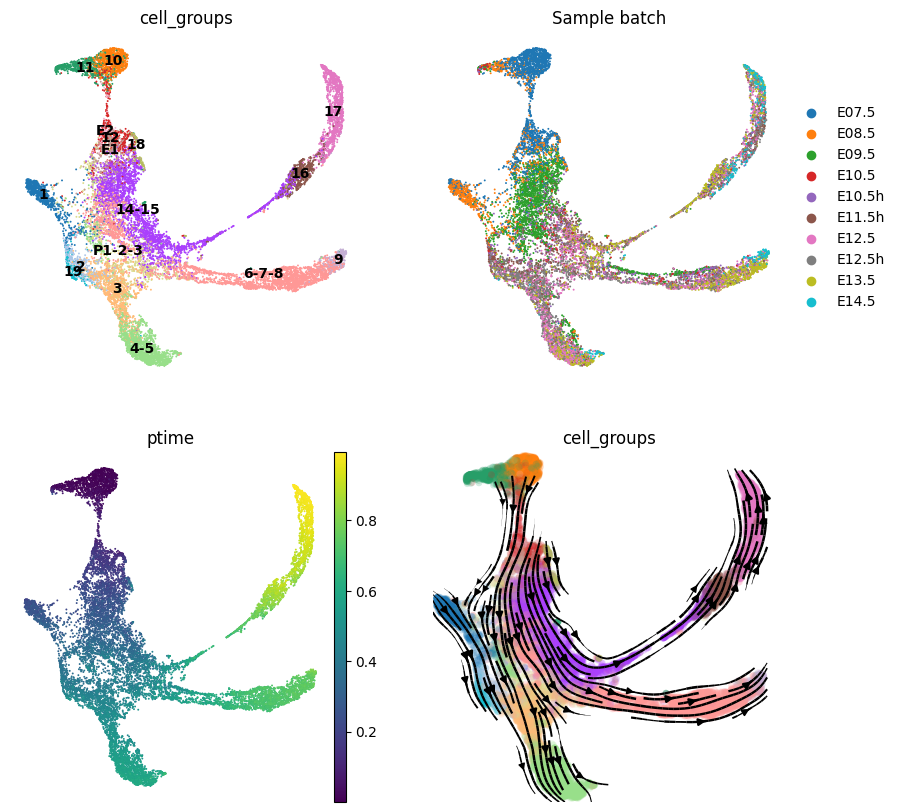

In [23]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
sc.pl.umap(data_tro_t, color='cell_groups', ax=axs[0, 0], legend_loc='on data', show=False, frameon=False)
sc.pl.umap(data_tro_t, color='Sample batch', ax=axs[0, 1], show=False, frameon=False)
sc.pl.umap(data_tro_t, color='ptime', ax=axs[1, 0], show=False, frameon=False)
sct.vf.plot_vector_field(data_tro_t, zs_key='X_TNODE', vf_key='X_VF', use_rep_neigh='X_TNODE', color='cell_groups', show=False, ax=axs[1, 1], legend_loc='none', frameon=False, size=100, alpha=0.2)
plt.show()